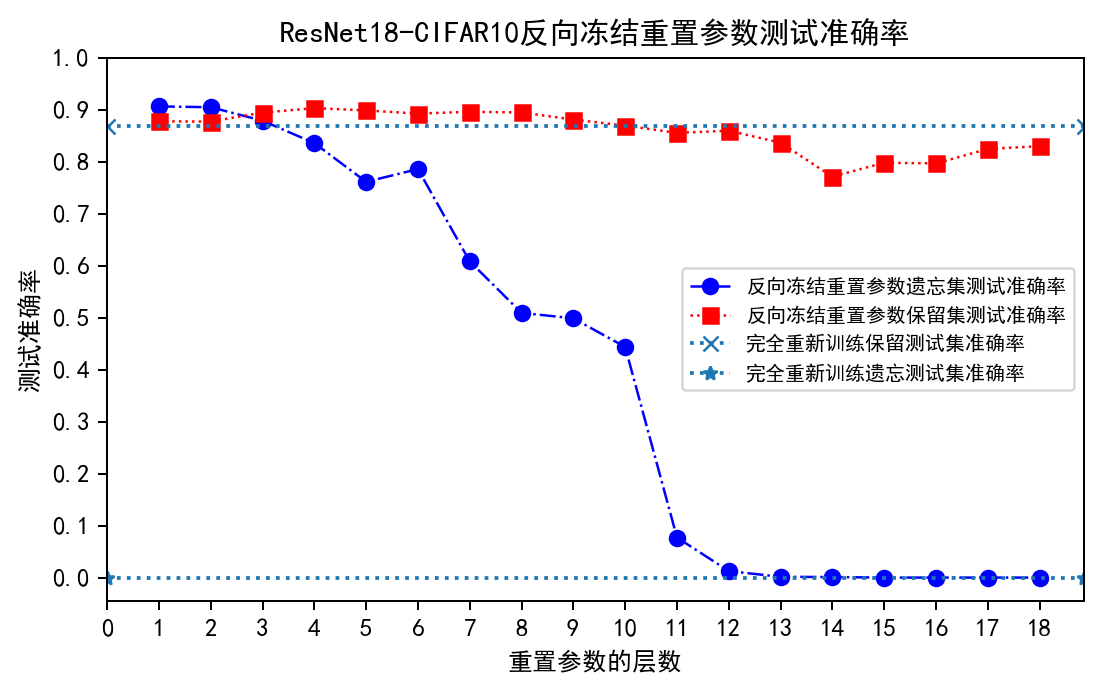

In [14]:
# resnet18 cifar10 反向冻结保留集和遗忘集准确率曲线
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数的层数')  # Add an x-label to the axes.
ax.set_ylabel('测试准确率')  # Add a y-label to the axes.
ax.set_title("ResNet18-CIFAR10反向冻结重置参数测试准确率")  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
X = np.linspace(1, 18, 18, endpoint=True)

reverse_reset_freeze_forget_acc = [
    90.600,90.450,87.850,83.550,76.100,78.550,
    60.800,50.900,49.850,44.350,7.700,1.250,
    0.150,0.100,0.000,0.000,0.000,0.000,
]
reverse_reset_freeze_retain_acc = [
    87.738,87.688,89.413,90.275,89.825,89.225,
    89.563,89.438,88.075,86.913,85.513,85.925,
    83.625,77.088,79.775,79.638,82.425,82.963,
]

retrain_retain_acc = 0.86788
retrain_forget_acc = 0.

CN = np.array(reverse_reset_freeze_forget_acc)
CN = np.divide(CN, np.array(100.))
SN = np.array(reverse_reset_freeze_retain_acc)
SN = np.divide(SN, np.array(100.))

plt.plot(X, CN, marker='o', linewidth=1, linestyle="dashdot",color='b', label="反向冻结重置参数遗忘集测试准确率")
plt.plot(X, SN, marker='s', linewidth=1, linestyle="dotted", color='r', label="反向冻结重置参数保留集测试准确率")
plt.axhline(y=retrain_retain_acc, marker='x',linestyle='dotted', label='完全重新训练保留测试集准确率')
plt.axhline(y=retrain_forget_acc, marker='*',linestyle='dotted', label='完全重新训练遗忘测试集准确率')
plt.xticks(np.linspace(0,18,19,endpoint=True))
plt.yticks(np.linspace(0,1,11,endpoint=True))

plt.legend(loc='center right',fontsize=8, frameon=True)
plt.savefig("./figures/chapter4_resnetcifar_reverse_acc.png",dpi=272)
plt.show()

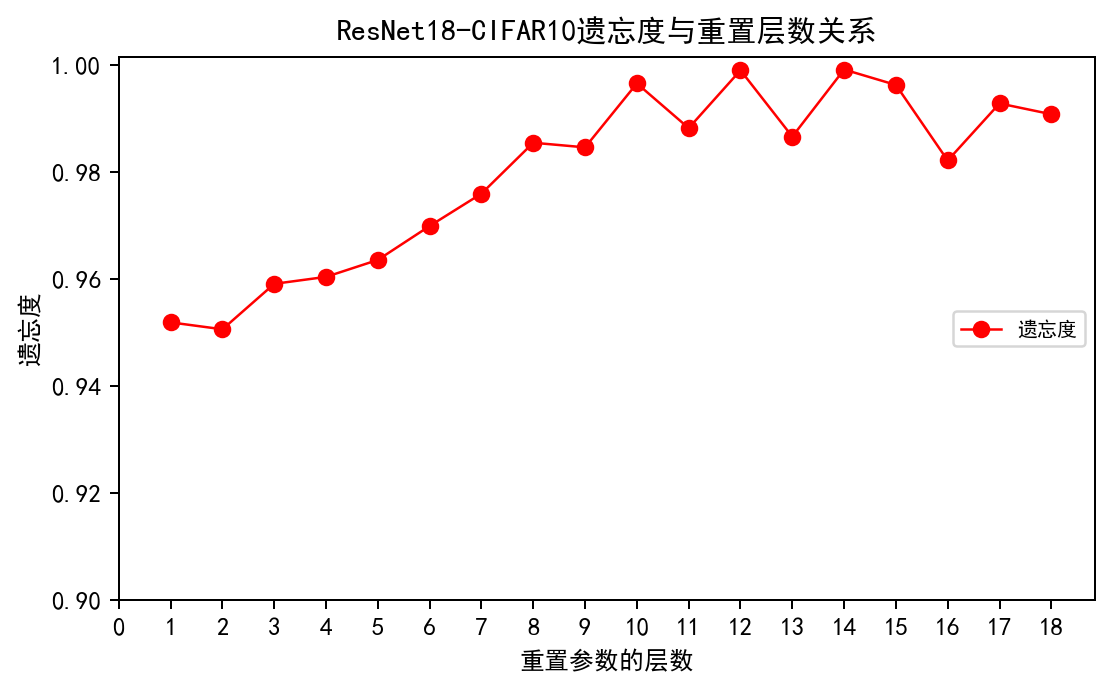

In [12]:
# resnet18 cifar10 正向冻结遗忘度曲线

import numpy as np
import matplotlib.pyplot as plt
from common.utils import calcForgetPercent

plt.figure(figsize=(7,4), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数的层数')  # Add an x-label to the axes.
ax.set_ylabel('遗忘度')  # Add a y-label to the axes.
ax.set_title("ResNet18-CIFAR10遗忘度与重置层数关系")  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
X = np.linspace(1, 18, 18, endpoint=True)

reset_freeze_forget_acc = [
    0,0,0,0,0,0,
    0,0,0,0,0,0,
    0,0,0,0,0,0,
]
reset_freeze_retain_acc = [
    90.963,91.075,90.338,90.225,89.950,89.400,
    88.875,88.050,88.125,87.088,87.813,86.875,
    85.625,86.863,86.463,85.238,86.163,85.988,
]

retrain_retain_acc = 0.86788
retrain_forget_acc = 0.

lrfForgetPercent = calcForgetPercent(reset_freeze_forget_acc, reset_freeze_retain_acc, retrain_forget_acc, retrain_retain_acc)
F = np.array(lrfForgetPercent)

plt.plot(X, F,  marker='o',linewidth=1, linestyle="solid", color='r', label="遗忘度")
plt.xticks(np.linspace(0,18,19,endpoint=True))
plt.yticks(np.linspace(0.9,1,6,endpoint=True))

plt.legend(loc='center right',fontsize=8, frameon=True)
plt.savefig("./figures/chapter4_resnetcifar_lrf_forget_percent.png",dpi=272)
plt.show()


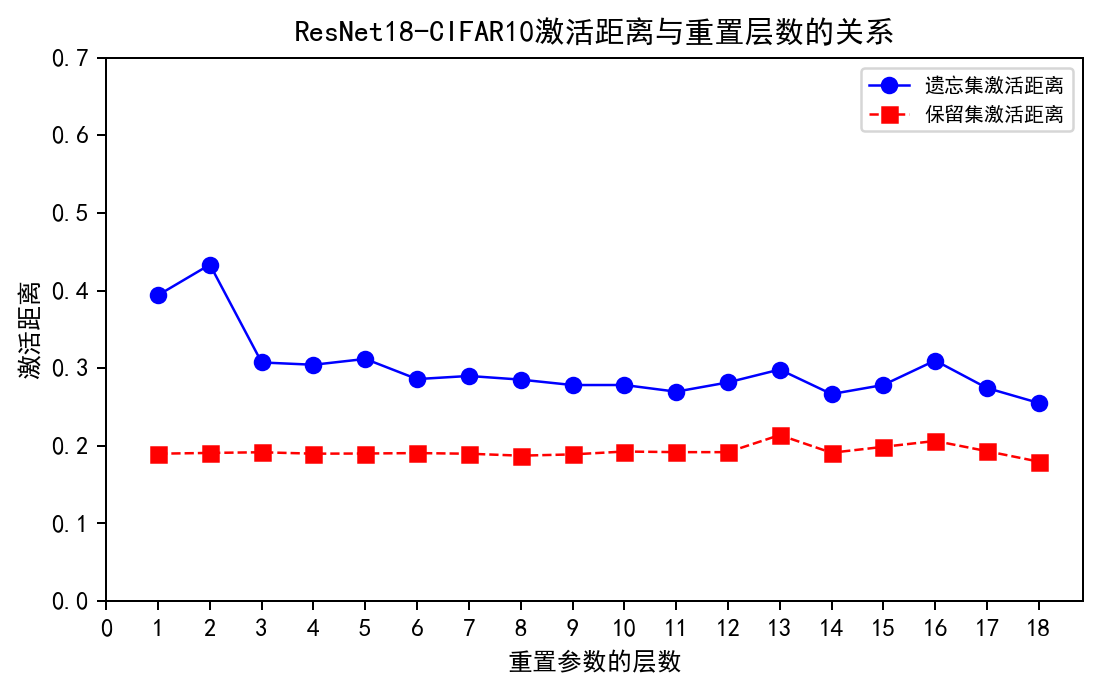

In [17]:
# resnet18 cifar10 LRF激活距离曲线
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数的层数')  # Add an x-label to the axes.
ax.set_ylabel('激活距离')  # Add a y-label to the axes.
ax.set_title("ResNet18-CIFAR10激活距离与重置层数的关系")  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
X = np.linspace(1, 18, 18, endpoint=True)
reset_freeze_active_distance_forget = [
    0.39400886,0.43335699,0.30737236,0.30437928,0.31189944,0.28594436,
    0.28996952,0.28526215,0.27826825,0.27832415,0.26973126,0.28166712,
    0.29825133,0.26666156,0.27837702,0.30985463,0.27445369,0.25519231,
]
reset_freeze_active_distance_retain = [
    0.18986267,0.19087424,0.19172060,0.18989651,0.19011170,0.19065930,
    0.18983096,0.18732828,0.18896693,0.19266102,0.19188603,0.19184597,
    0.21388821,0.19108589,0.19868527,0.20626073,0.19314007,0.17963358,
]
C = np.array(reset_freeze_active_distance_forget)
S = np.array(reset_freeze_active_distance_retain)

plt.plot(X, C, marker='o',linewidth=1, linestyle="solid",color='b', label="遗忘集激活距离")
plt.plot(X, S, marker='s',linewidth=1, linestyle="dashed",color='r', label="保留集激活距离")

plt.xticks(np.linspace(0,18,19,endpoint=True))
plt.yticks(np.linspace(0,0.7,8,endpoint=True))

plt.legend(fontsize=8)
plt.savefig("./figures/chapter4_resnetcifar_lrf_distance.png",dpi=272)
plt.show()


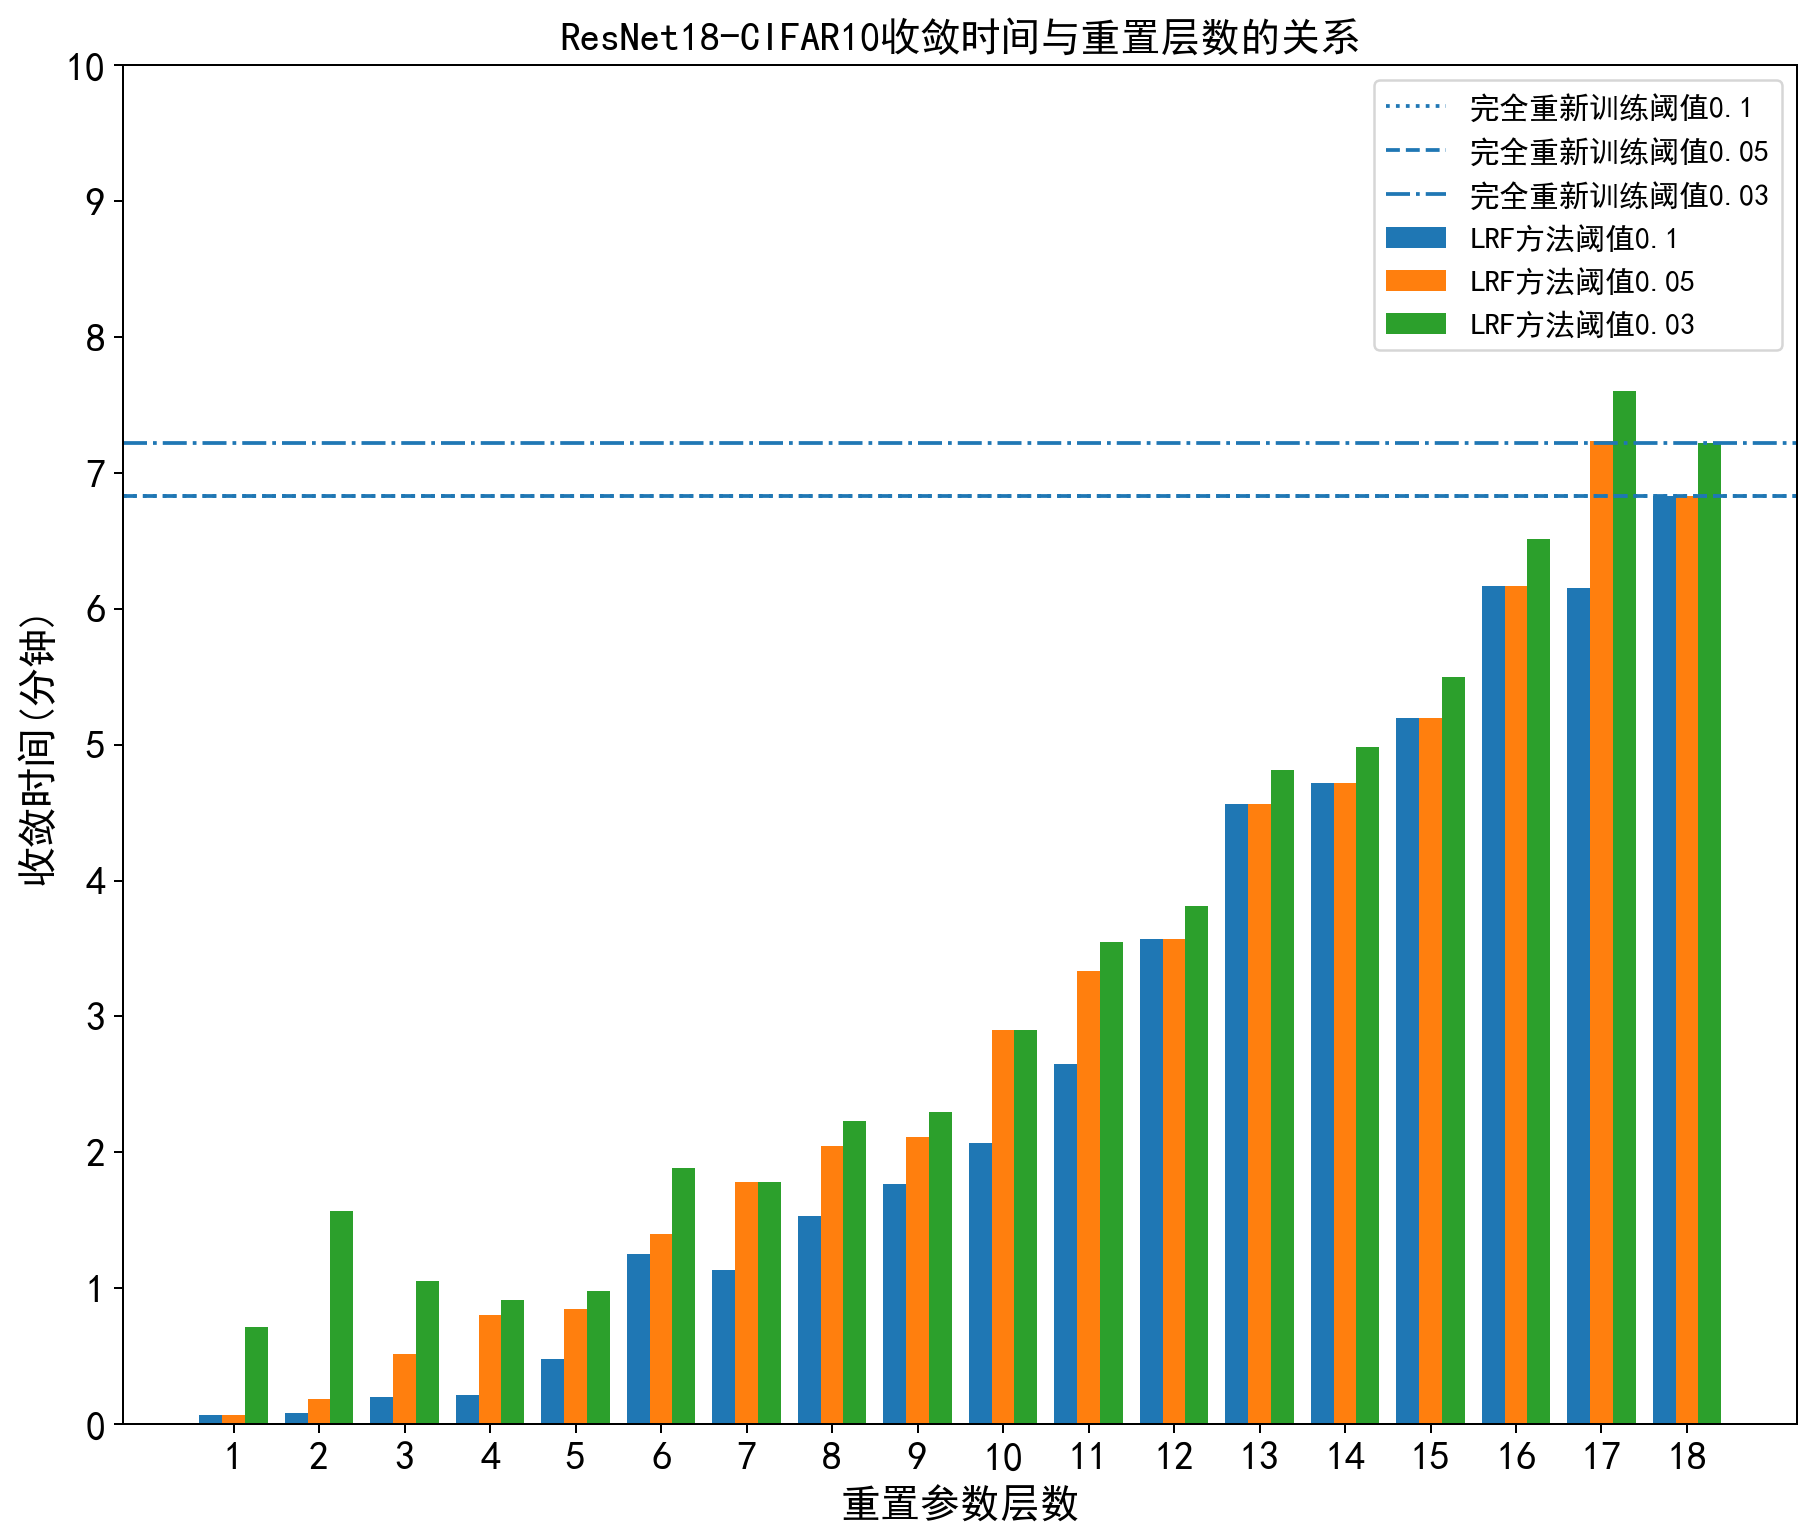

In [28]:
# resnet18 cifar10 LRF收敛时间曲线
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.figure(figsize=(12,10), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数层数', fontsize=16)  # Add an x-label to the axes.
ax.set_ylabel('收敛时间(分钟)', fontsize=16)  # Add a y-label to the axes.
ax.set_title("ResNet18-CIFAR10收敛时间与重置层数的关系", fontsize=16)  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
resnet_cifar_retrain_time = ['2021-03-22 16:07:30','2021-03-22 16:14:20','2021-03-22 16:14:20','2021-03-22 16:14:43']

resnet_cifar_lrf_time = [
    ['2021-03-22 14:25:05','2021-03-22 14:25:09','2021-03-22 14:25:09','2021-03-22 14:25:48'],
    ['2021-03-22 14:27:53','2021-03-22 14:27:58','2021-03-22 14:28:04','2021-03-22 14:29:27'],
    ['2021-03-22 14:30:52','2021-03-22 14:31:04','2021-03-22 14:31:23','2021-03-22 14:31:55'],
    ['2021-03-22 14:34:04','2021-03-22 14:34:17','2021-03-22 14:34:52','2021-03-22 14:34:59'],
    ['2021-03-22 14:37:33','2021-03-22 14:38:02','2021-03-22 14:38:24','2021-03-22 14:38:32'],
    ['2021-03-22 14:41:16','2021-03-22 14:42:31','2021-03-22 14:42:40','2021-03-22 14:43:09'],
    ['2021-03-22 14:46:01','2021-03-22 14:47:09','2021-03-22 14:47:48','2021-03-22 14:47:48'],
    ['2021-03-22 14:50:56','2021-03-22 14:52:28','2021-03-22 14:52:59','2021-03-22 14:53:10'],
    ['2021-03-22 14:56:07','2021-03-22 14:57:53','2021-03-22 14:58:14','2021-03-22 14:58:25'],
    ['2021-03-22 15:01:29','2021-03-22 15:03:33','2021-03-22 15:04:23','2021-03-22 15:04:23'],
    ['2021-03-22 15:07:45','2021-03-22 15:10:24','2021-03-22 15:11:05','2021-03-22 15:11:18'],
    ['2021-03-22 15:14:26','2021-03-22 15:18:00','2021-03-22 15:18:00','2021-03-22 15:18:15'],
    ['2021-07-10 19:31:13','2021-07-10 19:35:47','2021-07-10 19:35:47','2021-07-10 19:36:02'],
    ['2021-03-22 15:29:01','2021-03-22 15:33:44','2021-03-22 15:33:44','2021-03-22 15:34:00'],
    ['2021-03-22 15:37:22','2021-03-22 15:42:34','2021-03-22 15:42:34','2021-03-22 15:42:52'],
    ['2021-07-10 19:36:19','2021-07-10 19:42:29','2021-07-10 19:42:29','2021-07-10 19:42:50'],
    ['2021-03-22 15:56:37','2021-03-22 16:02:46','2021-03-22 16:03:51','2021-03-22 16:04:13'],
    ['2021-03-22 16:07:30','2021-03-22 16:14:20','2021-03-22 16:14:20','2021-03-22 16:14:43'],
]

times01 = []
times005 = []
times003 = []
spanS = []
for i in range(len(resnet_cifar_lrf_time)):
    time1 = datetime.strptime(resnet_cifar_lrf_time[i][0], "%Y-%m-%d %H:%M:%S")
    time2 = datetime.strptime(resnet_cifar_lrf_time[i][1], "%Y-%m-%d %H:%M:%S")
    time3 = datetime.strptime(resnet_cifar_lrf_time[i][2], "%Y-%m-%d %H:%M:%S")
    time4 = datetime.strptime(resnet_cifar_lrf_time[i][3], "%Y-%m-%d %H:%M:%S")
    timeDelta1 = time2 - time1
    timeDelta2 = time3 - time1
    timeDelta3 = time4 - time1
    times01.append(timeDelta1.seconds / 60)
    times005.append(timeDelta2.seconds / 60)
    times003.append(timeDelta3.seconds / 60)

retrainTime1 = datetime.strptime(resnet_cifar_retrain_time[0], "%Y-%m-%d %H:%M:%S")
retrainTime2 = datetime.strptime(resnet_cifar_retrain_time[1], "%Y-%m-%d %H:%M:%S")
retrainTime3 = datetime.strptime(resnet_cifar_retrain_time[2], "%Y-%m-%d %H:%M:%S")
retrainTime4 = datetime.strptime(resnet_cifar_retrain_time[3], "%Y-%m-%d %H:%M:%S")
timeDelta1 = retrainTime2 - retrainTime1
timeDelta2 = retrainTime3 - retrainTime1
timeDelta3 = retrainTime4 - retrainTime1

size = len(resnet_cifar_lrf_time)
x = np.arange(size)
x = np.add(x, np.array([1]))
a = np.array(times01)
b = np.array(times005)
c = np.array(times003)

total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='LRF方法阈值0.1')
plt.bar(x + width, b, width=width, label='LRF方法阈值0.05')
plt.bar(x + 2 * width, c, width=width, label='LRF方法阈值0.03')
plt.axhline(y=timeDelta1.seconds / 60, linestyle='dotted', label='完全重新训练阈值0.1')
plt.axhline(y=timeDelta2.seconds / 60, linestyle='dashed', label='完全重新训练阈值0.05')
plt.axhline(y=timeDelta3.seconds / 60, linestyle='dashdot', label='完全重新训练阈值0.03')
plt.xticks(np.linspace(1,18,18,endpoint=True), fontsize=16)
plt.yticks(np.linspace(0,10,11,endpoint=True), fontsize=16)
plt.legend(fontsize=12)
plt.savefig("./figures/chapter4_resnetcifar_lrf_time.png",dpi=272)
plt.show()
